In [1]:
import pandas as pd
import numpy as np


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r'C:\Users\omkar\OneDrive\Documents\Internship\New\IMDB Dataset.csv\IMDB Dataset.csv')

In [4]:
df.rename(columns={'sentiment': 'true_sentiment'}, inplace=True)

In [5]:
df.head()

,review,true_sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
if 'review' not in df.columns:
    raise ValueError("Dataset must contain a 'review' column")

In [7]:
from textblob import TextBlob

In [8]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [9]:
df['predicted_sentiment'] = df['review'].apply(get_sentiment)

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
df['true_sentiment'] = df['true_sentiment'].replace({'positive': 1, 'negative': -1})

C:\Users\omkar\AppData\Local\Temp\ipykernel_1900\582819860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['true_sentiment'] = df['true_sentiment'].replace({'positive': 1, 'negative': -1})


In [12]:
df['predicted_sentiment'] = df['predicted_sentiment'].apply(lambda x: 1 if x >= 0 else -1)

In [13]:
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

          -1       0.89      0.43      0.58     25000
           1       0.62      0.95      0.75     25000

    accuracy                           0.69     50000
   macro avg       0.76      0.69      0.67     50000
weighted avg       0.76      0.69      0.67     50000



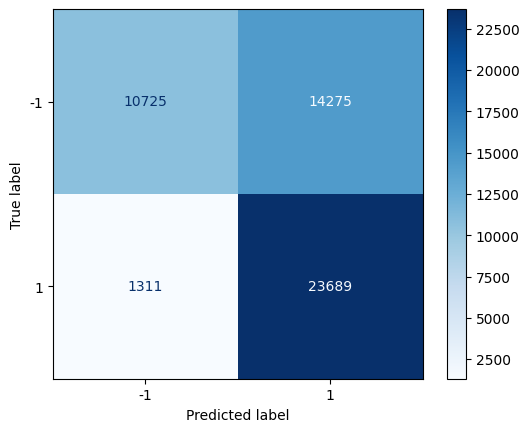

In [14]:
print(classification_report(df['true_sentiment'],df['predicted_sentiment']))
cm = confusion_matrix(df['true_sentiment'],df['predicted_sentiment'], labels=[-1, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [15]:
df.to_csv('imdb_reviews_with_sentiment.csv', index=False)


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sid = SentimentIntensityAnalyzer()

In [19]:
if 'review' not in df.columns:
    raise ValueError("Dataset must contain a 'review' column")

In [20]:
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

In [21]:
df['vader_predicted_sentiment'] = df['review'].apply(get_vader_sentiment)


In [22]:
df['vader_predicted_sentiment'] = df['vader_predicted_sentiment'].apply(lambda x: 1 if x >= 0 else -1)

              precision    recall  f1-score   support

          -1       0.79      0.54      0.64     25000
           1       0.65      0.86      0.74     25000

    accuracy                           0.70     50000
   macro avg       0.72      0.70      0.69     50000
weighted avg       0.72      0.70      0.69     50000



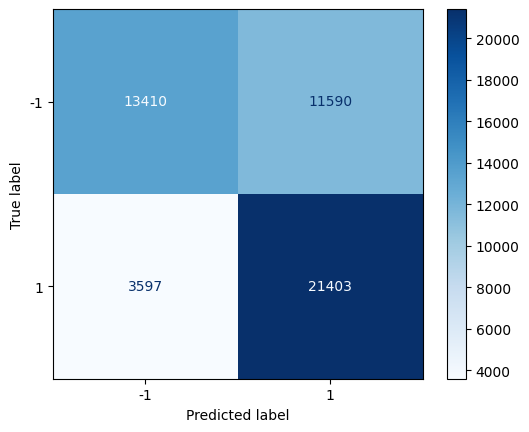

In [23]:
print(classification_report(df['true_sentiment'],df['vader_predicted_sentiment']))
cm = confusion_matrix(df['true_sentiment'],df['vader_predicted_sentiment'], labels=[-1, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
df.to_csv('imdb_reviews_with_vader_sentiment.csv', index=False)

In [25]:
from transformers import pipeline

c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [27]:
sampled_df = df.sample(frac=0.1, random_state=42)

In [28]:
from transformers import AutoTokenizer

In [29]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [35]:
MAX_LENGTH = 510

In [36]:
def get_hf_sentiment(text):
    tokens = tokenizer.tokenize(text)
    if len(tokens) > MAX_LENGTH:
        tokens = tokens[:MAX_LENGTH]
    truncated_text = tokenizer.convert_tokens_to_string(tokens)
    result = sentiment_pipeline(truncated_text)[0]
    hf_sentiment = result['label']
    score = result['score']
    return hf_sentiment, score

In [37]:
from tqdm import tqdm

In [38]:
tqdm.pandas()

In [39]:
sampled_df[['hf_sentiment', 'score']] = sampled_df['review'].progress_apply(lambda x: pd.Series(get_hf_sentiment(str(x))))

100%|██████████| 5000/5000 [11:34<00:00,  7.20it/s]


In [45]:
sampled_df['hf_sentiment'] = sampled_df['hf_sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': -1})

C:\Users\omkar\AppData\Local\Temp\ipykernel_1900\3972855369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sampled_df['hf_sentiment'] = sampled_df['hf_sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': -1})


              precision    recall  f1-score   support

          -1       0.86      0.92      0.89      2481
           1       0.92      0.85      0.88      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



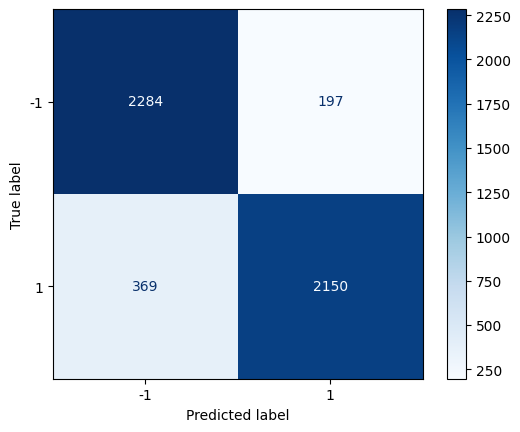

In [46]:
print(classification_report(sampled_df['true_sentiment'],sampled_df['hf_sentiment']))
cm = confusion_matrix(sampled_df['true_sentiment'],sampled_df['hf_sentiment'], labels=[-1, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()